## *SECTION 2 / SPRINT 1 / NOTE 1*

# Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [4]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.

import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

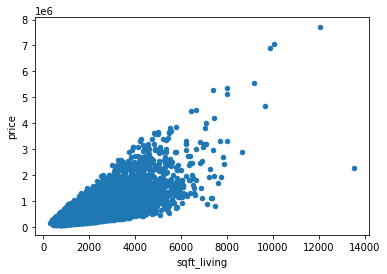

In [6]:
df.corr()['price'].sort_values(ascending=False).head()

df.plot.scatter(x = 'sqft_living', y = 'price')

In [7]:
target = 'price'

### 상관관계가 가장 높은 변수는 -> sqft_living

In [8]:
#sqft_living 과 price에 대해서 시각화 해보기 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

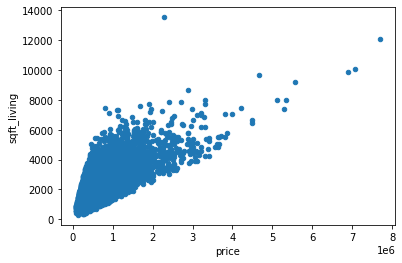

In [9]:
print(df.corr()['price'].sort_values(ascending=False).head())

df.plot.scatter(x='price', y='sqft_living')

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

<AxesSubplot:xlabel='grade', ylabel='price'>

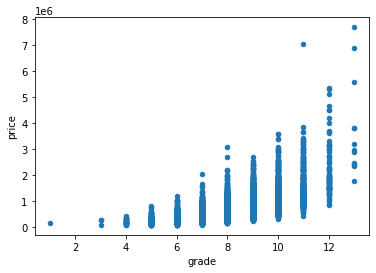

In [10]:
#print(df.corr()[''].sort_values(ascending=False).head())

df.plot.scatter(x='grade', y='price')

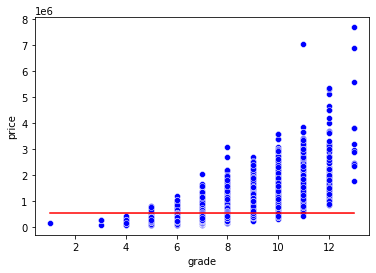

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df['grade']
y = df['price']

predict = df['price'].mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

6 grade가 6일때 주택의 price 예상 가격은 $194700 입니다.


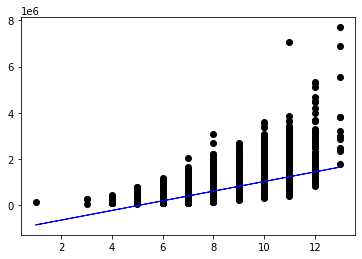

In [35]:
# cklearn 패키지에서 예측 모델에 필요한 모듈을 불러온다. 

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# x 특성들의 테이블과, y 타겟 벡터 만들기

x_train = df[['grade']]   #데이터프레임 형태로 만들어야함
y_train = df[['price']] 

# 모델 학습시키기 

model.fit(X_train, y_train)

# 데이터 샘플을 선택해 학습한 모델에 넣어 예측하기

X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} grade가 6일때 주택의 price 예상 가격은 ${int(y_pred)} 입니다.')

# 전체 테스트 데이터를 모델을 통해 예측하기 

X_test = [[x] for x in df['grade']]
y_pred = model.predict(X_test)

# train 데이터에 대한 그래프를 그려보겠습니다.

plt.scatter(X_train, y_train, color='black', linewidth=1)

# test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.

plt.plot(X_test, y_pred, color='blue', linewidth=1);

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [39]:
# coefficient (계수)
model.coef_ # 기울기가 208457인 회귀선을 가지고 있다. 

208457

### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

[[-42177.62525499]]


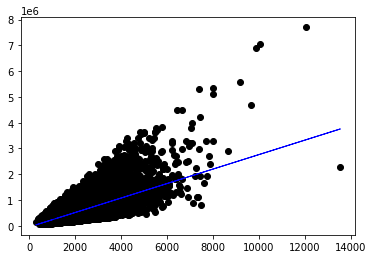

In [52]:
# 모듈 임포트
from sklearn.linear_model import LinearRegression

# 모듈 입히기 
mymodel = LinearRegression()

# 훈련데이터 입력

x_train = df[['sqft_living']]
y_train = df[['price']]

# 모델 학습 

mymodel.fit(x_train,y_train)

# 예측하기 

x_test = [[5]]
y_pred = mymodel.predict(x_test)

print(y_pred)

# 모델을 통해 회귀선 예측

x_test = [[i] for i in df['sqft_living']]
y_pred = mymodel.predict(x_test)

# 시각화 

import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color ='black', linewidth=1)
plt.plot(x_test, y_pred, color ='blue', linewidth= 1)

[[280.6235679]]


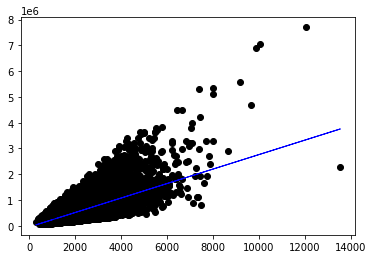

In [51]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression

## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test = [[x] for x in df['sqft_living']]
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.plot(X_test, y_pred, color='blue', linewidth=1);

print(model.coef_)

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###